In [7]:
using Hadamard
using Plots
using Zygote
using Optimisers
using Images
using ImageView
using FFTW
using Statistics

In [8]:
nbits = 16

types = Dict(
	8 => UInt8,
	16 => UInt16,
	32 => UInt32,
	64 => UInt64
)

range = 0:2^(nbits)-1

inSpace = 50

data = unique(rand(range, 50) .|> types[nbits]);


In [12]:
toSpins(a::Bool) = toSpins(Val(a))
toSpins(a::Val{true}) = -1
toSpins(a::Val{false}) = +1
toSpins(a::BitArray) = toSpins.(a)

toBits(a::Number) = a > 0
toBits(a::AbstractArray) = toBits.(ifwht(a))

toBitArray(x::Number) = begin
	arr = Array{Bool}(undef, sizeof(x)*8)
	for i in 1:sizeof(x)*8
		arr[i] = 0x01&x
		x >>= 1
	end
	return BitArray(arr)
end


toBitArray (generic function with 1 method)

In [13]:
dataset = toBitArray.(data)

50-element Vector{BitVector}:
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
 [1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
 [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
 [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
 [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
 [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
 [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0]
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]
 [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]
 ⋮
 [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
 [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0]
 [1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]
 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
 [0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1]
 [1, 1, 0, 0, 0, 

In [14]:
opt = Descent(0.1f0)

image = []
ds = []
overlap = []

aCoeffs = rand(nbits)

for epoch in 1:10000
	b = dataset[rand(1:length(dataset))]
	bCoeffs = fwht(b |> toSpins)
	grads = gradient((x, y) -> -dot(x, y), aCoeffs, bCoeffs)
	aCoeffs .-= grads[1]*opt.eta
	aCoeffs .= aCoeffs/norm(aCoeffs)
	push!(image, toBits(aCoeffs))
	push!(ds, dot(aCoeffs, bCoeffs))
end


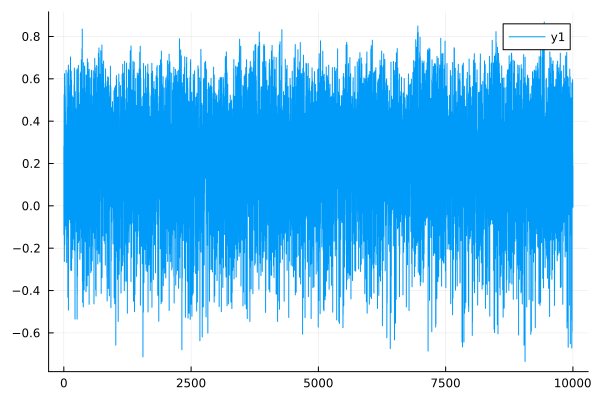

In [17]:
bitImage = hcat(image...)
img = Gray.(0.5.*(toSpins(repeat(bitImage, inner=(100, 1))) .+ 1));
imshow(img);
plot(ds)

In [23]:
# Compute Threshold
dbs = []
for b in dataset
	bCoeffs = fwht(b |> toSpins)
	push!(dbs, dot(aCoeffs, bCoeffs))
end

In [24]:
threshold = mean(dbs)

# Plot Nonlinearity capability
image3 = []
ds3 = []

for i in range
	b = toBitArray(i |> types[nbits])
	bCoeffs = fwht(b |> toSpins)
	push!(image3, toBits(aCoeffs))
	push!(ds3, dot(aCoeffs, bCoeffs) > threshold)
end

# plot(data, 1:46)


In [27]:
bitImage3 = hcat(image3...)
img3 = Gray.(0.5.*(toSpins(repeat(bitImage3, inner=(20, 1))) .+ 1));
# imshow(img3)

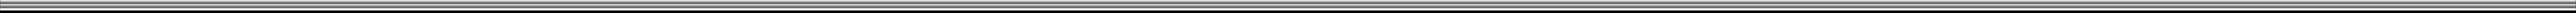

In [29]:
img3